# Statistical Inference

- Statistics is a science about collecting, summarizing and making inference from data.
- Statistical inference involves drawing conclusions about populations from samples.

Here, we will focus on two of the most common population parameters:

* Population mean $\mu$:
  - average height of all American;
  - average salary of all Connecticut residents, and etc.
* Population proportion $p$:
  - Proportion of American who support Harris;
  - Proportion of people who have taken COVID19 vaccine.

# Hypothesis Testing

- Sometimes, we may have some preconceived ideas regarding to the unknown population parameters.
- The sample data we collect can help us decide the plausibility of these ideas and this is accomplished by **Hypothesis Testing**. 


Hypothesis testing involves drawing inferences about two contrasting propositions (each called a hypothesis) relating to the value of one or more population parameters.

* $H_0$ **Null hypothesis**: describes an existing theory or status quo
* $H_1$ (or $H_a$) **Alternative hypothesis**: Usually is our research interest (a challenge or alternative to accepted view).

**Note**: Using sample data, we either:
* Reject $H_0$ and conclude the sample data is in favor of $H_1$, or
* Fail to reject $H_0$
  - Fail to reject $H_0$ does not mean $H_0$ is true.
  - It only mean there is no sufficient evidence to disprove it with the data we have collect.

## How to test?

1. **Set up hypotheses**: Statistically, we cannot “prove” that $H_0$ is true. We can only fail to reject it. So, what we want to test (our research of interest) is usually set as alternative hypothesis ($H_1$).


2. To conduct a Hypothesis Test,
   - we initially assume that $H_0$ is true.
   - Then, we calculate the chance of observing the sample data under this assumption.
   - This gives us an idea of whether or not our assumption ($H_0$ is true) is "reasonable";
   - it leads us to a decision whether or not reject the null hypothesis.

## Intuition (A Legal Analogy for Hypothesis Testing)

The idea of hypothesis testing follows close to the idea of proof by contradiction. Here, we use a legal analogy to explain the hypothesis testing:

In the U.S. legal system, a defendant is innocent until proven guilty.

  *  $H_0$: Innocent
  *  $H_1$: Guilty

1. So, we start by assuming the defendant is innocent ($H_0$).
2. The sample data we collect can be seen as the evidence.
   * Under the assumption of innocent ($H_0$), what is the chance of getting the evidence (sample data) that we have in hand.
   * If the chance is small, then, this means our assumption of innocent is questionable and our evidence is in favor of the alternative guilty ($H_1$).
   * If the chance is large, then, this means our data does not provide enough evidence to rule the defendant is guilty. 

## Type of tests:

### One Sample tests

Primary interest is on one single population:
* 1-sample t test
* 1-sample proportion test

### Two Sample tests

Primary interest is to make comparison between two population:
* 2-sample t test
* paired t test

For the above tests, we are going to use the ```stats``` submodule from library ```statsmodels``` and ```scipy```.

In [1]:
import scipy.stats as scs
import statsmodels.stats.api as sms

## One sample tests

### 1-sample t test

For one sample test for population mean, the hypotheses in general has the following form:
$$H_0: \mu = \mu_0.$$
$$H_1: \mu > \mu_0, \mu < \mu_0, \text{ or } \mu \ne \mu_0.$$

where $\mu_0$ is the preconceived idea you have ahead of time.

We start with the simplest case:
* Sample are independent.
* We have a large sample size ($\ge 30$).

Under this senario, the appropriate test is 1-sample t test. The function you want to use is ```scs.ttest_1samp```.

Example:

According to the Food and Nutrition Board of the National Academy of Sciences, the recommended daily allowance (RDA) of calcium for adults is 800 milligrams. You have the data of the daily calcium intake (in mg.) for a sample of people with poverty level incomes. <u>The researchers believe that the mean daily calcium intake for poverty level income people is **below** the recommended 800 mg</u>. Conduct a hypothesis test to test this claim.

$$H_0: \mu = 800.$$
$$H_1: \mu < 800.$$

In [2]:
import pandas as pd
calcium = pd.read_csv("data/calcium.csv")
calcium.shape

(40, 1)

In [3]:
calcium.head()

,Calcium
0,870
1,791
2,677
3,748
4,699


In [ ]:
help(scs.ttest_1samp)

In [7]:
a = scs.ttest_1samp(calcium, popmean=800, alternative='less')
# popmean is mu_0.
# Possible values for alternative: 'two-sided'; 'greater'; 'less'.
a

TtestResult(statistic=array([-3.99532412]), pvalue=array([0.00013886]), df=array([39]))

In [6]:
type(a)

scipy.stats._stats_py.TtestResult

In [8]:
dir(a)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getnewargs_ex__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_alternative',
 '_asdict',
 '_estimate',
 '_extra_fields',
 '_fields',
 '_standard_error',
 'confidence_interval',
 'count',
 'df',
 'index',
 'pvalue',
 'statistic']

In [ ]:
a.statistic[0]

-3.9953241227660783

In [11]:
scs.ttest_1samp(calcium, popmean=800, alternative='less')

TtestResult(statistic=array([-3.99532412]), pvalue=array([0.00013886]), df=array([39]))

In [12]:
t_score, p_value = scs.ttest_1samp(calcium, popmean=800, alternative='less')
print('The test statistics is {}, and the p value is {}.'.format(t_score.round(4)[0], p_value.round(4)[0]))

The test statistics is -3.9953, and the p value is 0.0001.


In [13]:
t_score

array([-3.99532412])

### Making decision

Now, we need to make a decision whether or not to reject the null hypothesis. The decision depends on the p-value and significance level ($\alpha$). 

* The p-value is the probability of obtaining a test statistic value equal to or more extreme than observed when the null hypothesis is true.
* The significance level is usually specified ahead of time and common values are: 0.1, 0.05, 0.01.

In the end
* we reject the null hypothesis, and in favor of the alternative hypothesis if p-value< $\alpha$.
* we fail to reject the null hypothesis if p-value $\ge\alpha$. **Remember**, this is not saying $H_0$ is correct.

In this case, using $\alpha = 0.05$, 
1. We will reject the null hypothesis.
2. Conclude that the mean daily calcium intake for poverty level income people is below the recommended level. 

### small sample case

- When the sample size is large, we do not need to pose any assumption on the distribution of our data.
- As long as they are independent, the t test will be valid by the **Central Limit Theorem**.
- However, it maybe the case that our sample is smaller than 30.
- Under this case, it is required to check the normality assumption before conducting the t test. 

### check normality assumption

To check whether or not our data are from a normal distribution, we can simply plot the data to see

### histogram

<Axes: ylabel='Count'>

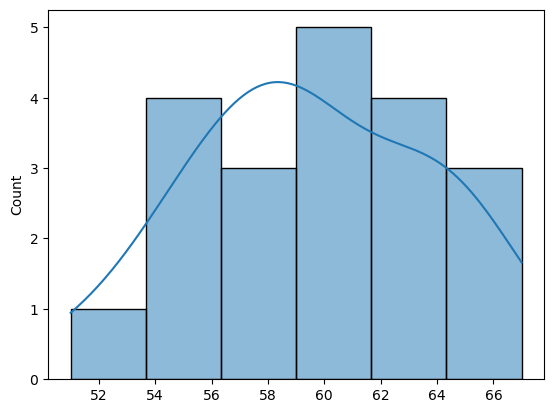

In [14]:
data = [58,  67,  63,  65,  59,  57,  51,  64,  59,  54, 65,  56,  59,  58,  62,  64,  55,  59,  61, 55]
import seaborn as sns
sns.histplot(data, kde=True)

### quantile-quantile plot (qq plot)

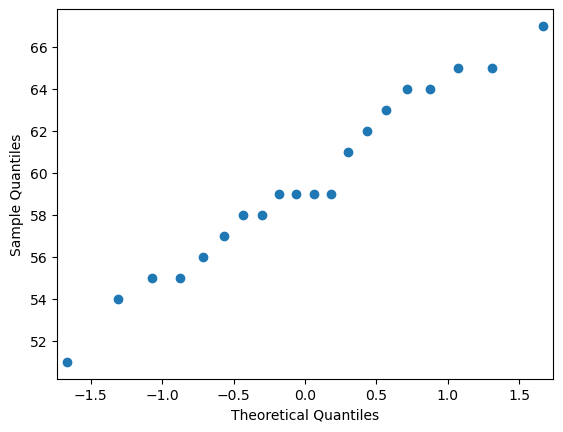

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
fig = sm.qqplot(np.array(data))
#fig.set_size_inches(10, 8)

### shapiro wilk test

The above checkings for normality assumption by visualization are relative subjective. To make it formal, we can use shapiro wilk test to test the normality assumption.

$$H_0: \text{The data is from normal distribution}$$
$$H_1: \text{The data is not from normal distribution}$$

In [16]:
scs.shapiro(data)

ShapiroResult(statistic=0.9724048595730944, pvalue=0.8046379114177866)

In [17]:
scs.shapiro(calcium)

ShapiroResult(statistic=0.9696178252402867, pvalue=0.34999651297891066)

Use $\alpha = 0.05$, we can say the normality assumption is appropriate for this data.

## 1-sample proportion test

For one sample test for populationproportion, the hypotheses in general has the following form:
$$H_0: p = p_0.$$
$$H_1: p > p_0; p < p_0; \text{ or } p \ne p_0.$$

where $p_0$ is the preconceived idea you have ahead of time.

We start with the simplest case:

* Sample are independent.
* $np_0(1-p_0) \ge 5$

Under this senario, the appropriate test is 1-sample proportion test. The function you want to use is ```sms.proportions_ztest```.

Example:

A recent survey claimed that 45% of college students named "Pretty Little Liars" as their favorite of the two shows.  Fans of "Breaking Bad" believed that percentage was inflated (<u>that is, these fans believe that the proportion of college students who would say "Pretty Little Liars" was their favorite show is actually **less that** 45%</u>). They decided to take a survey of 100 college students.  Each student was asked the question: “Did you prefer ‘Pretty Little Liars’ over "Breaking Bad" during the years 2012-2013?"  Each person could answer either Yes or No. 

$$H_0: p = 0.45.$$
$$H_1: p < 0.45.$$

In [ ]:
import pandas as pd
tv = pd.read_csv('data/tv.csv')

In [ ]:
tv.head()

In [ ]:
help(sms.proportions_ztest)

In [ ]:
tv.groupby("ANSWER").size()

In [ ]:
a = pd.crosstab(index = tv.ANSWER, columns='count', margins=True)
a

In [ ]:
a.loc['YES', 'count'], a.iloc[1, 0], a.loc['All', 'count'],  a.iloc[2, 0]

In [ ]:
sms.proportions_ztest(count = a.loc['YES', 'count'], nobs = a.loc['All', 'count'], value = 0.45, alternative='smaller', prop_var=0.45)

In [ ]:
sms.proportions_ztest(count = 36, nobs = 100, value = 0.45, alternative='smaller', prop_var=0.45)

In [ ]:
z_score, p_value = sms.proportions_ztest(count = 36, nobs = 100, value = 0.45, alternative='smaller', prop_var=0.45)
print('The test statistics is {}, and the p value is {}.'.format(z_score.round(4), p_value.round(4)))

In this case, using $\alpha = 0.05$, 

1. We will reject the null hypothesis.
2. Conclude that the percentage from the survey is inflated.

## Two sample tests

For a two sample test for population means, the hypotheses in general has the following form:
$$H_0: \mu_1 = \mu_2.$$
$$H_1: \mu_1 > \mu_2; \mu_1 < \mu_2; \mu_1 \ne \mu_2.$$

where $\mu_1$ and $\mu_2$ stand for means of populations 1 and 2.


When

* Two populations are independent.
* Samples are from normal distribution (can be relaxed if sample size $\ge$ 30).

Under this senario, the appropriate test is 2-sample t test. The function you want to use is ```sms.ttest_ind```.

Example:

Suppose you suspect that the engineering students will have a higher average SAT math score than business students, and you would like to do a test of hypothesis to check if your suspicions are confirmed.

$$H_0: \mu_1 = \mu_2.$$
$$H_1: \mu_1 > \mu_2.$$

In [ ]:
sat = pd.read_csv("data/mathsat.csv")

In [ ]:
sat.head()

In [ ]:
sat.shape # small sample size

### normality check

In [ ]:
scs.shapiro(sat.Engineering)

In [ ]:
scs.shapiro(sat.Business.dropna())

In [ ]:
sat.Business.dropna()

In [ ]:
t_score, p_value, degree_fr = sms.ttest_ind(sat.Engineering, sat.Business.dropna(),
                                            alternative='larger', usevar = 'unequal')

print('The test statistics is {}, and the p value is {}.'.format(t_score.round(4), p_value.round(4)))

### Decision

In this case, using $\alpha = 0.05$, 

1. We fail reject the null hypothesis.
2. Conclude that there is no enough evidence to support the claim that engineering students will have a higher average SAT math score. 

## two sample test for dependent population

Sometime, we want to compare two populations that are dependent. For example, the performance of a student before and after some study session; reaction time for left and right hand, and etc. 

In this case, the appropriate test is the paired t-test. The hypotheses take the general form:

$$H_0: \mu_1 = \mu_2.$$
$$H_1: \mu_1 > \mu_2; \mu_1 < \mu_2; \mu_1 \ne \mu_2.$$

Because of the unique feature of the data (data comes in pair), conducting the paired t test is equivalent to test:

$$H_0: d = 0$$
$$H_1: d>0; d<0; d\ne0.$$
where $d = \mu_1 - \mu_2$. Notice that the different is independent. So, we have a 1-sample problem and this test can be done using 1-sample t test.

Example:

Many students take a course which is advertised to boost scores on the LSAT.  <u>The agency that teaches the course claims the course is an **effective** way to raise scores on the LSAT</u>.  To test this claim, a group of students are given the LSAT and their scores are recorded.  They then attend the course for 5 weeks and retake the exam.  Their scores are recorded again.  

$$H_0: \mu_1 = \mu_2 \text{ or } d = 0$$
$$H_1: \mu_1 < \mu_2\text{ or } d < 0.$$

In [ ]:
lsat = pd.read_csv('data/lsat.csv')

In [ ]:
lsat.head()

In [ ]:
diff = lsat.PRESCORE - lsat.POSTSCORE
diff

In [ ]:
scs.shapiro(diff)

In [ ]:
t_score, p_value = scs.ttest_1samp(diff, popmean=0, alternative='less')
print('The test statistics is {}, and the p value is {}.'.format(t_score.round(4), p_value.round(4)))

### Decision

In this case, using $\alpha = 0.05$, 

1. We reject the null hypothesis.
2. Conclude that the course is effective.